# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Optimizing Self-Driving

Notebook 3 - Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Cropping2D

In [3]:
np.random.seed(42)

In [5]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [6]:
df.center[0]

'IMG/center_2016_12_01_13_30_48_287.jpg'

In [12]:
img = mpimg.imread('../data/dataset-1/'+df.center[0], 0)

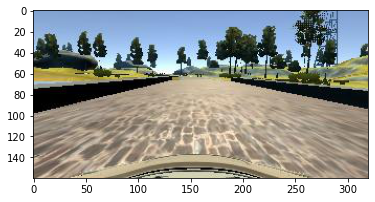

In [13]:
imgplot = plt.imshow(img)

In [41]:
height, width, channel = (len(img), len(img[0]), len(img[0][0]))

In [48]:
img_cropped = img[60:-25, :, :]

In [51]:
img_resized = cv2.resize(img_cropped, (320, 160), cv2.INTER_AREA)

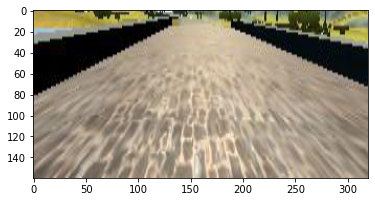

In [53]:
plt.imshow(img_resized)

In [22]:
X = df[['center', 'left', 'right']].values
y = df['steering'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
model = Sequential()
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=(160, 320, 3)))
model.add(Conv2D(filters=24, kernel_size=(5, 5), activation='elu', strides=2))
model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='elu', strides=2))
model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='elu', strides=2))
#     model.add(Conv2D(24, 5, 5, activation='elu', subsample=(2, 2)))
#     model.add(Conv2D(36, 5, 5, activation='elu', subsample=(2, 2)))
#     model.add(Conv2D(48, 5, 5, activation='elu', subsample=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu'))
# model.add(Dropout(args.keep_prob))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_12 (Lambda)           (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 78, 158, 24)       1824      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 37, 77, 36)        21636     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 17, 37, 48)        43248     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 35, 64)        27712     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 33, 64)        36928     
_________________________________________________________________
dropout_28 (Dropout)         (None, 13, 33, 64)       

In [46]:
model.compile(loss='mse', optimizer='adam')

In [47]:
model.fit(X_train, y_train,
        steps_per_epoch=20000,
        epochs=3,
        max_queue_size=1,
        validation_data=(X_test, y_test),
        validation_steps=len(X_valid),
        verbose=1)


Epoch 1/3


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer conv2d_20 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [1, 3]
